# [課題] House Sales in KingCounty, USA

URL：  https://www.kaggle.com/harlfoxem/housesalesprediction/

<div style="text-align: right;">
作成日: 2018年02月06日<br>
作成者: 藤原 涼
</div>

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.linear_model import LinearRegression

In [3]:
# データの読み込みと中身の確認
csv_file_path="../1_data/kc_house_data.csv"
df_data = pd.read_csv(csv_file_path)

print(df_data.columns)
print("データの個数と変数の数を確認")
display(df_data.shape)

print("データの中身を確認")
display(df_data.head())
display(df_data.tail())

print("データの型などの情報を確認")
display(df_data.info())

## 目的変数を並び替えたときの他のパラメータの状況も確認しておく
print("価格の低い順")
display(df_data.sort_values(["price"], ascending= True).head())

print("価格の高い順")
display(df_data.sort_values(["price"], ascending= False).head())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
データの個数と変数の数を確認


(21613, 21)

データの中身を確認


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


データの型などの情報を確認
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


None

価格の低い順


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


価格の高い順


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


# データの中身を確認する

| カラム | 英語 | 日本語 |
|:-|:-|:-|
| id (Numeric) | a notation for a house | |
| date (String) | Date house was sold | 売却された日時 |
| price (Numeric) | Price is prediction target | 売却価格 |
| bedrooms (Numeric) | Number of Bedrooms/House | 1つの家に対して寝室の数 |
| bathrooms (Numeric) | Number of bathrooms/bedrooms |1つの寝室に対しての浴室の数 |
| sqft_living (DateTime) | square footage of the home | 家の面積(平方メートル) |
| sqft_lot (Numeric) | square footage of the lot | 敷地面積(平方メートル) |
| floors (Numeric) | Total floors (levels) in house | 家の中の部屋の数 |
| waterfront (Numeric) | House which has a view to a waterfront | 湖岸通り、水辺を見渡すことが出来るか |
| view (Numeric) | Has been viewed | 内見された回数 |
| condition (Numeric) | How good the condition is ( Overall ) | 状態の良さ |
| grade (Numeric) | overall grade given to the housing unit, based on King County grading system | [ King County grading system]によって与えられた、家の等級 |
| sqft_above (Numeric) | square footage of house apart from basement | 地下から離れた家の広場 |
| sqft_basement (Numeric) | square footage of the basement | 地下の広場 |
| yr_built (Numeric) | Built Year | 築年 |
| yr_renovated (Numeric) |  Year when house was renovated | 家が改築された年 |
| zipcode (Numeric) | zip | 郵便番号 |
| lat (Numeric) | Latitude coordinate | 経度座標 |
| long (Numeric) | Longitude coordinate | 緯度座標 |
| sqft_living15 (Numeric) | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area | 2015年のリビングルームエリア（いくつかの改装を含む）これはロットサイズエリアに影響を与えたかもしれない |
| sqft_lot15 (Numeric) | lotSize area in 2015(implies-- some renovations) | 2015年のlotSize領域（一部の改装を含む） | 

## 目的変数

- 売却価格である、「price」が目的変数


## 感じたことをメモ

- 位置情報
   - 郵便番号 = 経度と緯度である程度表されるので、郵便番号は利用しなくて良さそうかな
   - 「経度と緯度」つまり、家がある地域と価格の関係性があるかどうかは可視化してみると面白そうかも
- 売却された日や時間と価格は関係あるのかな
   - 同じ土地でも売却された日によって変化があるのか、時系列データにはなりそうだけど分類とかにつかえるのかな
- yr_renovated が無いときは0、あったときは年度が入っている。桁数が大きく変わるのである・なしでフラグを管理し、データの傾向を見たほうが良いかもしれない
- 「bedrooms」と「bathrooms」について
   - bedrooms:   Number of Bedrooms/House        :1つの家に対して寝室の数
   - bathrooms:  Number of bathrooms/bedrooms  : 1つの寝室に対しての浴室の数
   - アメリカではプリバシーを守るために浴室の数が多い習慣があるらしいが、それにあわせてベッドルームを基準に考えているのかな
- 「sqft_living15」と「sqft_lot15」について
   - 2015年地点の家の面積と敷地面積。改修前とあとでどの程度の差分があったのかを1つの指標にしてみるとまた結果って変わったりするのかな

# 欠損値を確認する

読み込んだデータに欠損値があるかどうかを確認する。
欠損値がある場合、そのデータの意味を考え、補完するのか削除するのかを考える。

In [4]:
# カラム別に欠損値を確認する
pd.DataFrame(df_data.isnull().sum())

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


上記結果より欠損値がないことが確認できる

## データ単体の統計的な特徴を確認する

In [5]:
## 価格の金額が大きくなる傾向にあったので単位を1万ドルにして計算を実施する
df_data["price"] = df_data["price"] / 10**6 #単位を100万ドルにしておく
# 個数や平均値、 標準偏差, 最小値, 最大値など
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e-01,3.671272e-01,7.500000e-02,3.219500e-01,4.500000e-01,6.450000e-01,7.700000e+00
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


price


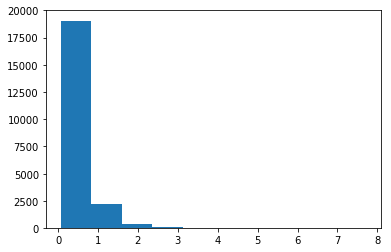

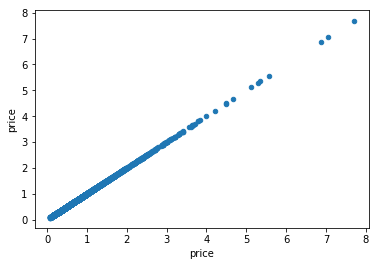

bedrooms


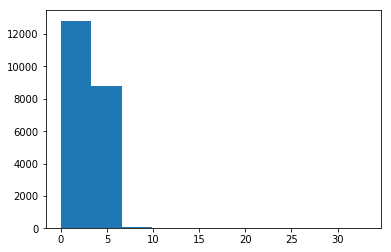

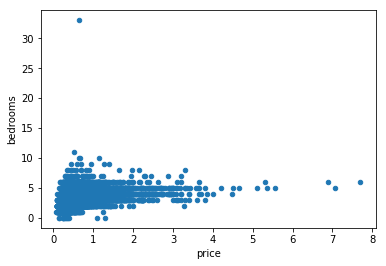

bathrooms


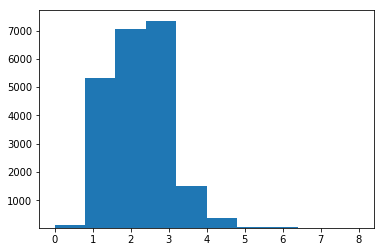

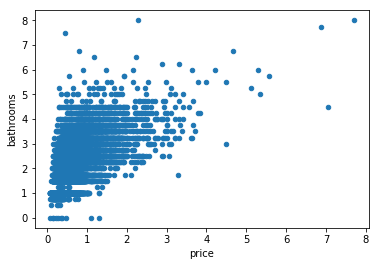

sqft_living


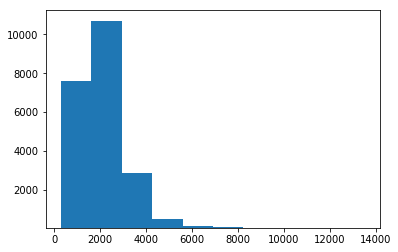

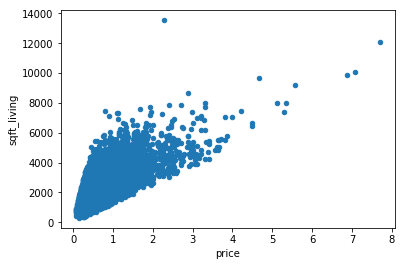

sqft_lot


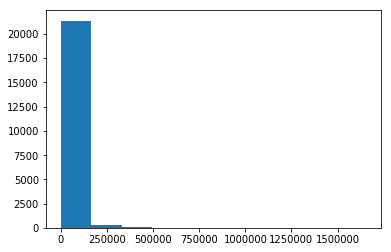

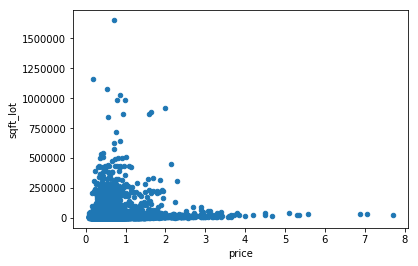

floors


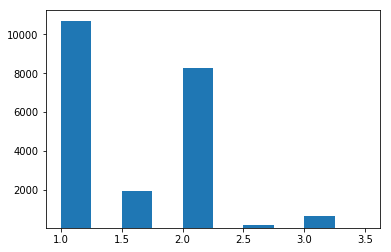

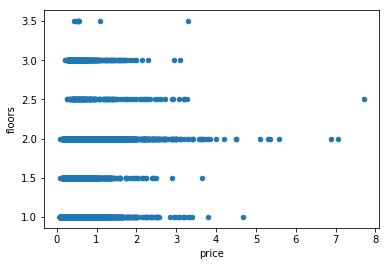

waterfront


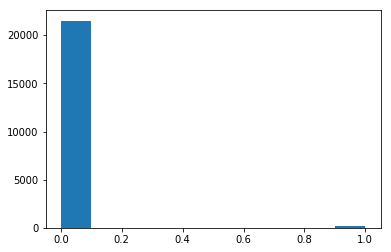

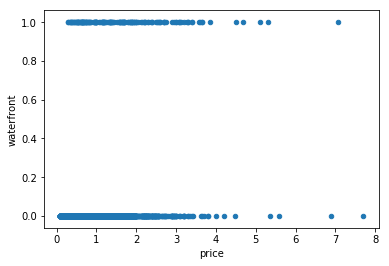

view


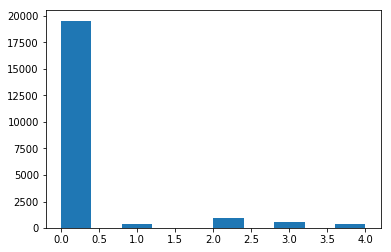

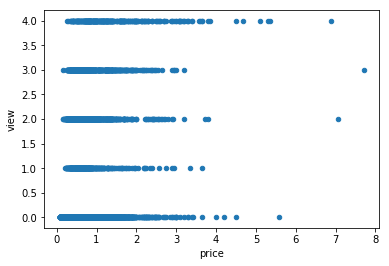

condition


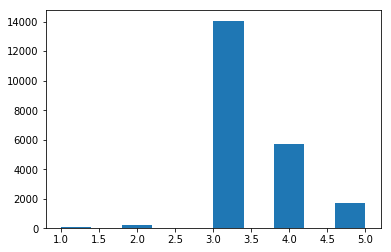

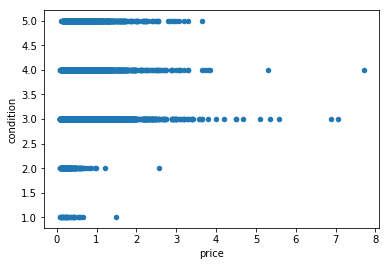

grade


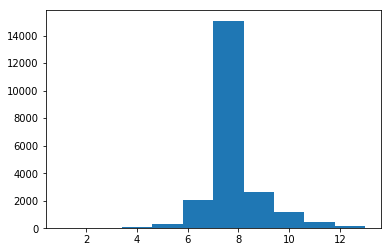

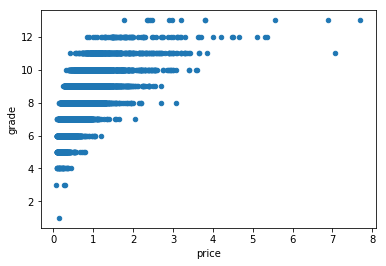

sqft_above


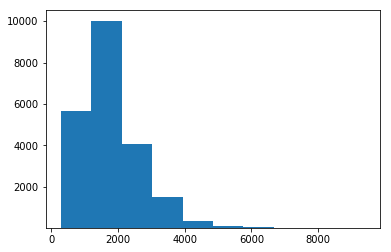

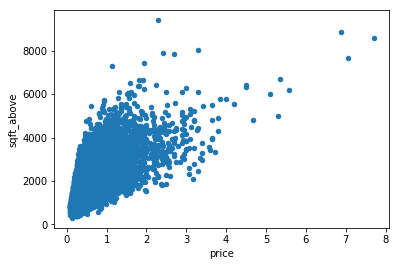

sqft_basement


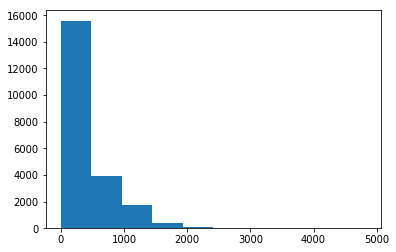

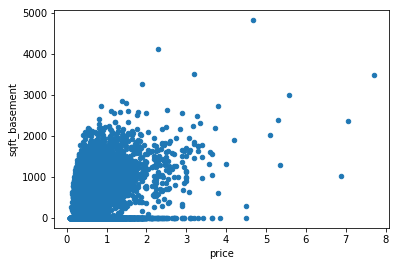

yr_built


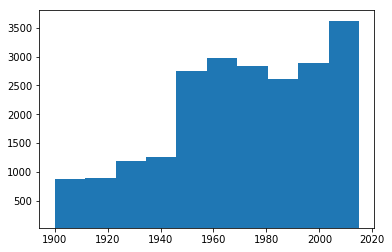

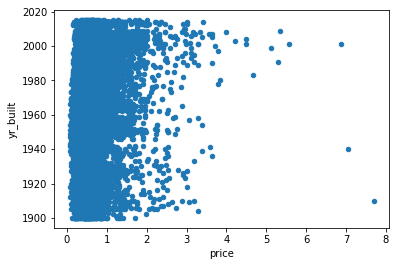

yr_renovated


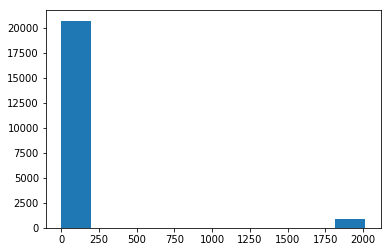

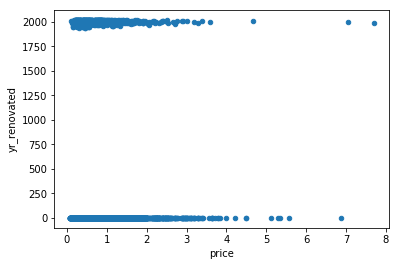

zipcode


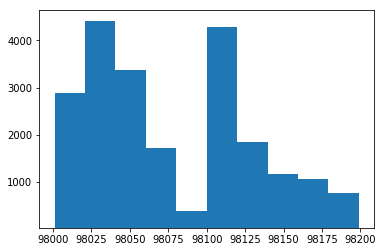

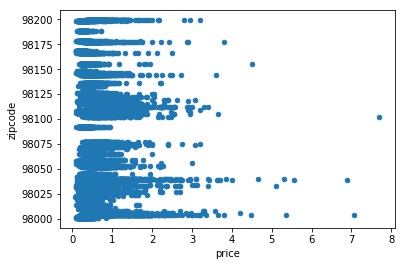

lat


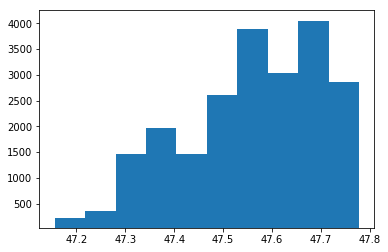

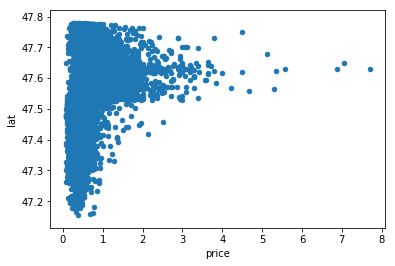

long


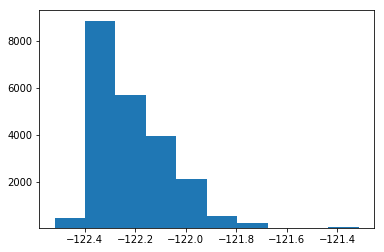

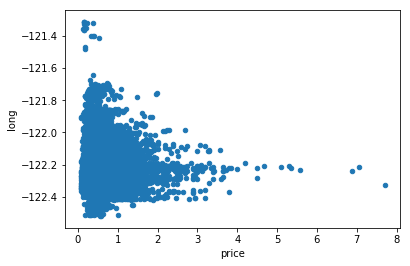

sqft_living15


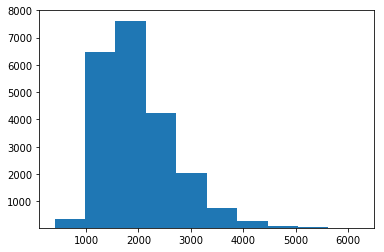

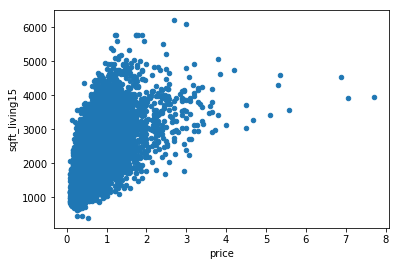

sqft_lot15


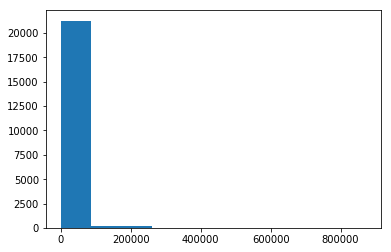

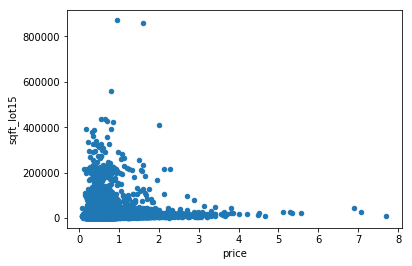

In [6]:
# 各説明変数の分布を確認する
for column in df_data.columns.values:
    if column in ["id", "date"]:
        continue
    print(column)

    plt.hist(df_data[column], bottom=30, bins=10)
    plt.show()
    
    # それ以外のデータは散布図で描画
    df_data.plot(kind="scatter",x="price",y=column)
    plt.show()

In [7]:
print("各データ同士の相関係数を表示")
df_data.corr()

各データ同士の相関係数を表示


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


データを確認するとヒストグラムや散布図に偏りがある場合があるので、
気になるデータの部分について考察後、実際に外れ値についての対応をどうするかを検討する。

- price
   - 10等分にした際に、ほぼ1等級目にデータが固まっている
   - 価格が非常に高い者が紛れ込んでいる可能性がある
- bedrooms
   - 浴室の数も1~2等級目にデータが固まっている
   - priceとの相関がありそうな値ではあるので、priceが高いデータが影響している可能性もある
- sqft_living
   - 浴室同様にpriceとの相関がありそうな値なので、priceが高いデータに影響していないかをチェック
- sqft_lot
   - 1等級目にデータが固まっているのが気になる
   - priceとの相関はなさそうである

一旦この4つくらいかな...

### priceについてデータの外れ値について
ヒストグラム上で10分割した際にデータの偏りが大きく見られたので10分割のデータの中身をそれぞれ確認してみる

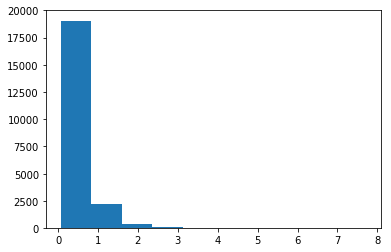

In [8]:
# 改めてpriceの分布について確認
plt.hist(df_data["price"], bottom=30, bins=10)
plt.show()

In [9]:
# priceを10分割にしてみると、圧倒的に1階級目にデータが偏っているがまずは割合を確認する
max_price = df_data[["price"]].max().values[0]
min_price = df_data[["price"]].min().values[0]
unit_price = (max_price-min_price)/10
print("分割する価格", unit_price)

data_price = {}
total_rate=0
for index in range(0,10):
    min_value = unit_price * index
    max_value = unit_price * (index+1)   
    unit = df_data[(df_data["price"] > min_value) & (df_data["price"] <= max_value) ]
    # 各等級のデータ件数と全体に対するデータの割合を計算する
    rate = round(len(unit.index)/len(df_data.index)*100,2)
    total_rate = total_rate + rate
    data_price[index] = {"最低金額(100万ドル)": min_value,"count(件数)":len(unit.index), "rate(%)":rate, "total_rate(%)":total_rate}

display(pd.DataFrame(data_price))

分割する価格 0.7625


,0,1,2,3,4,5,6,7,8,9
count(件数),18174.00,2938.0000,357.000,99.0000,32.00,5.0000,3.000,2.0000,0.00,2.0000
rate(%),84.09,13.5900,1.650,0.4600,0.15,0.0200,0.010,0.0100,0.00,0.0100
total_rate(%),84.09,97.6800,99.330,99.7900,99.94,99.9600,99.970,99.9800,99.98,99.9900
最低金額(100万ドル),0.00,0.7625,1.525,2.2875,3.05,3.8125,4.575,5.3375,6.10,6.8625


priceだけの分布を見ると0~4等級の区間だけで99.94%のデータを占めている。<br>
上記表より感覚的に、上位1%は他のデータと比べて価格が大きくなりすぎる傾向があるようなので、外れ値として除外してみる。<br>
そのため、全体の99.33%のデータである「1.525」百万ドルより大きい購入価格については外れ値とする。<br>
（※ 今回は10分割にした結果の99.33%の区切りだけど、本来はちゃんと1%とかにしたほうが良いんだろうな。。。）<br>

TODO: 本当は、四分位数（pandas quantile）などを求めて外れ値を除外したほうが良いのだろうが、良く分かっていないので今は一旦このまま進める
TODO: 正則化や正規化を行ったほうが良い気がするが一旦進める

In [10]:
df_data_2 = df_data[df_data["price"] < 1.525]

### bedroomsの外れ値について
データを確認すると1件だけ「33」という異常値が表示されている。
他の値を見てもbedroomsだけが格段に大きい状況のため、外れ値として対象のデータを削除する

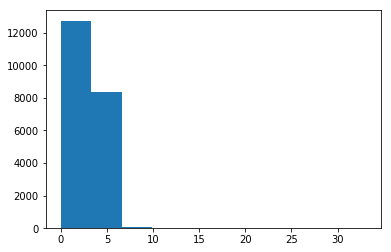

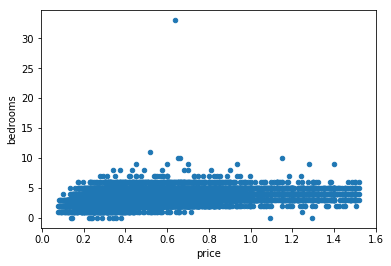

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,0.640,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,0.520,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,20141029T000000,0.650,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,20140814T000000,1.148,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,0.660,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [11]:
# 改めて bedrooms の分布について確認
plt.hist(df_data_2["bedrooms"], bottom=30, bins=10)
df_data_2.plot(kind="scatter",x="price",y="bedrooms")
plt.show()
    
display(df_data_2.sort_values("bedrooms", ascending=False).head())
df_data_3 = df_data_2[df_data_2["bedrooms"] < 20]

### sqft_living の外れ値について
元データのヒストグラムを見ると1件だけ5000程度値が外れているものがあったが、<br>
price や bedrooms の外れ値を除外した際に、対象のデータも削除されている。<br>
改めて確認しても大きな外れ値はなさそうなので、このままにしておく。

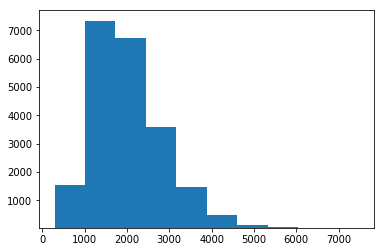

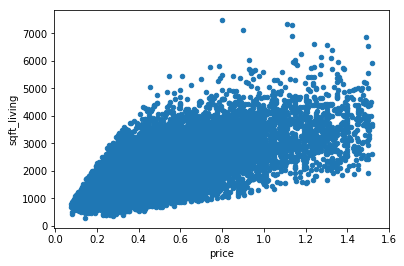

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,9175600025,20141007T000000,0.80000,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
2713,7851980260,20140730T000000,1.11000,5,3.50,7350,12231,2.0,0,4,...,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587
18594,3023069166,20140708T000000,1.13525,5,4.00,7320,217800,2.0,0,0,...,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
21050,2424059170,20150219T000000,0.90000,5,6.00,7120,40806,2.0,0,4,...,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859
11685,1126069045,20140620T000000,1.13500,6,4.25,6900,244716,2.0,0,0,...,9,4820,2080,2002,0,98077,47.7506,-122.012,4170,266587


In [12]:
# 改めて bedrooms の分布について確認
plt.hist(df_data_3["sqft_living"], bottom=30, bins=10)
df_data_3.plot(kind="scatter",x="price",y="sqft_living")
plt.show()

df_data_3.sort_values("sqft_living", ascending=False).head()


### sqft_lot の外れ値について
ヒストグラムを見ると全体のデータと比べて数件非常に大きな土地のあるデータが紛れ込んでいることが分かる。<br>
散布図より「500,000」程度の値を外れ値として削除する。
（※ 本当はこんな感覚値は駄目だと思う...）

TODO: ここも統計的に上位1%のデータは削除や正則化標準化したときの値で検証したほうが良い気がしている...

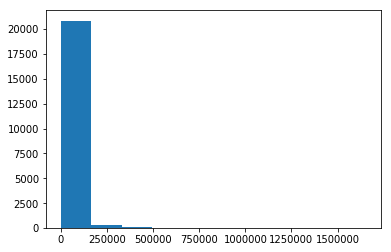

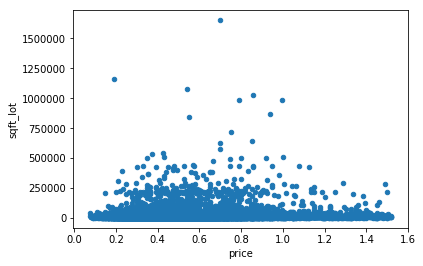

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327T000000,0.7000,4,1.00,1300,1651359,1.0,0,3,...,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581
17319,3326079016,20150504T000000,0.1900,2,1.00,710,1164794,1.0,0,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
7647,2623069031,20140521T000000,0.5425,5,3.25,3010,1074218,1.5,0,0,...,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
7769,2323089009,20150119T000000,0.8550,4,3.50,4030,1024068,2.0,0,0,...,10,4030,0,2006,0,98045,47.4619,-121.744,1830,11700
3949,722069232,20140905T000000,0.9980,4,3.25,3770,982998,2.0,0,0,...,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141


In [13]:
# 改めて sqft_lot の分布について確認
plt.hist(df_data_3["sqft_lot"], bottom=30, bins=10)
df_data_3.plot(kind="scatter",x="price",y="sqft_lot")
plt.show()

display(df_data_3.sort_values("sqft_lot", ascending=False).head())

df_data_4 = df_data_3[df_data_3["sqft_lot"] < 500000]

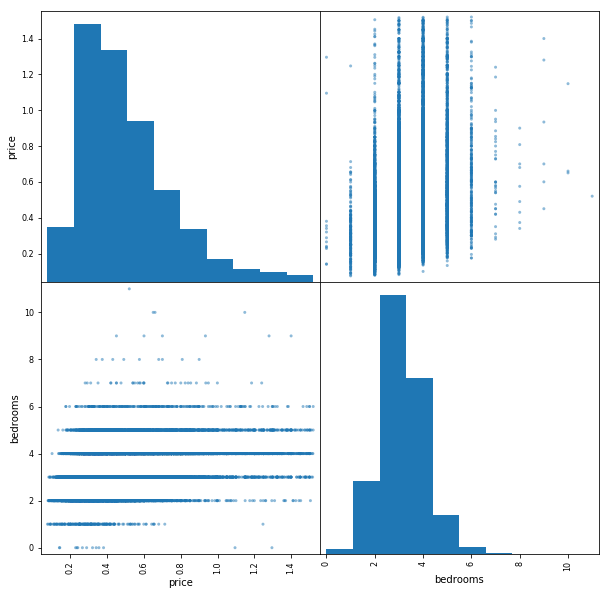

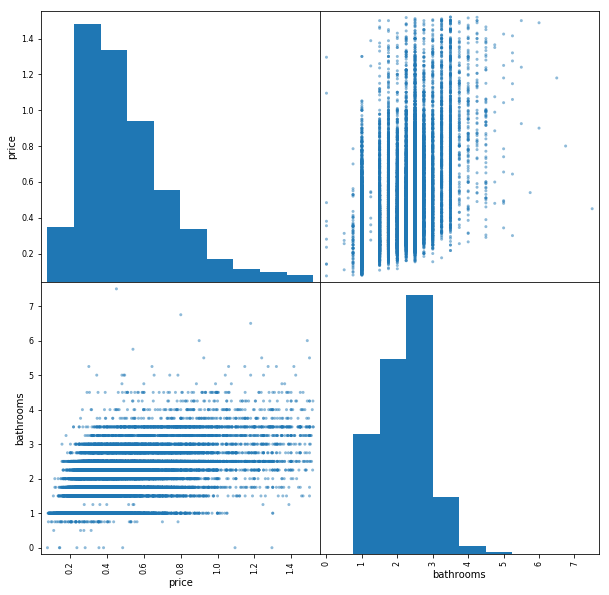

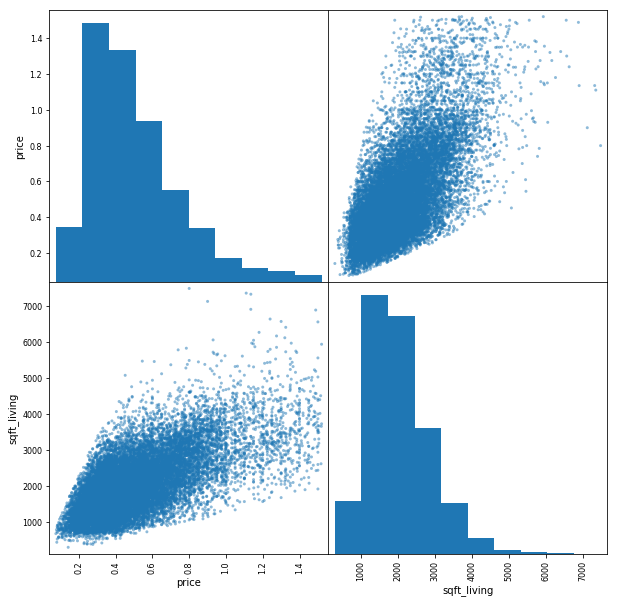

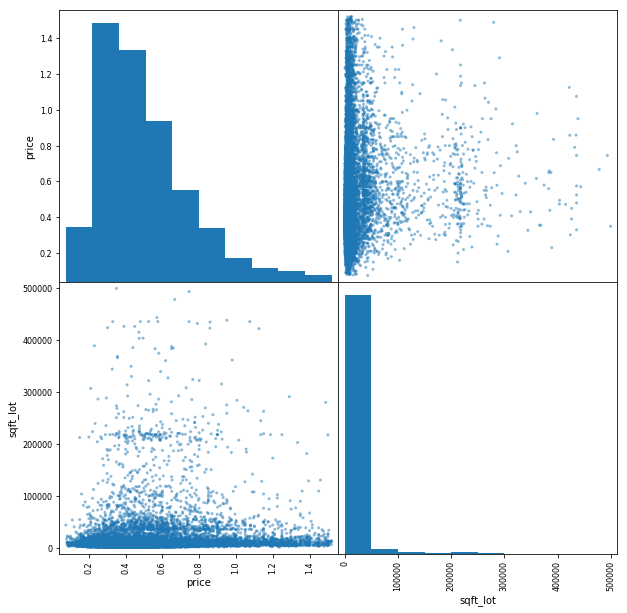

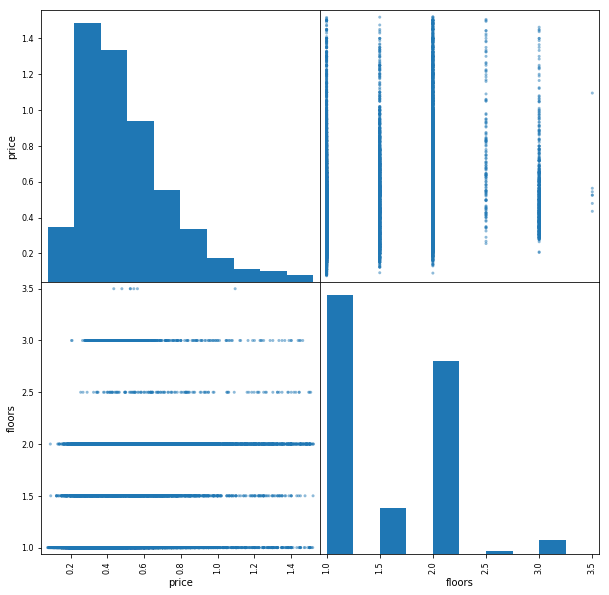

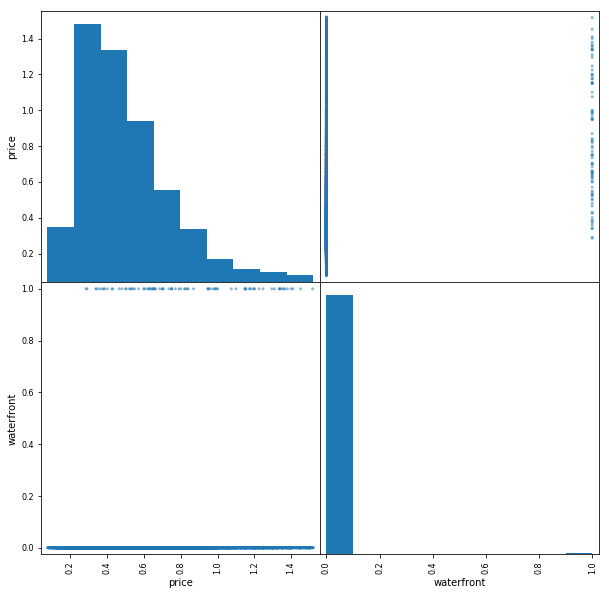

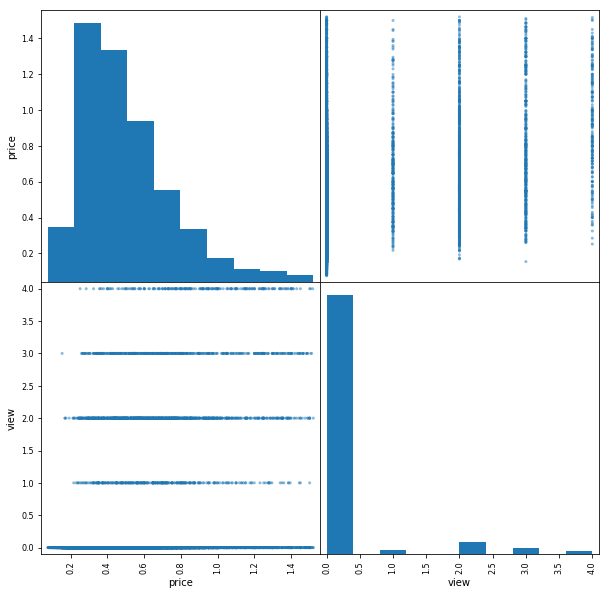

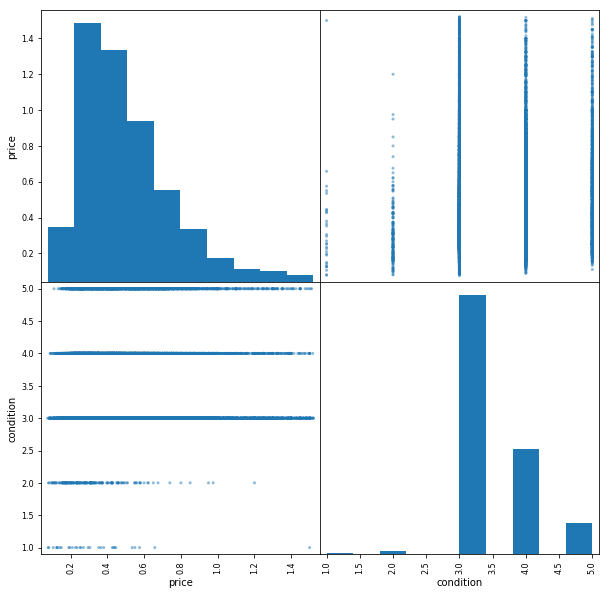

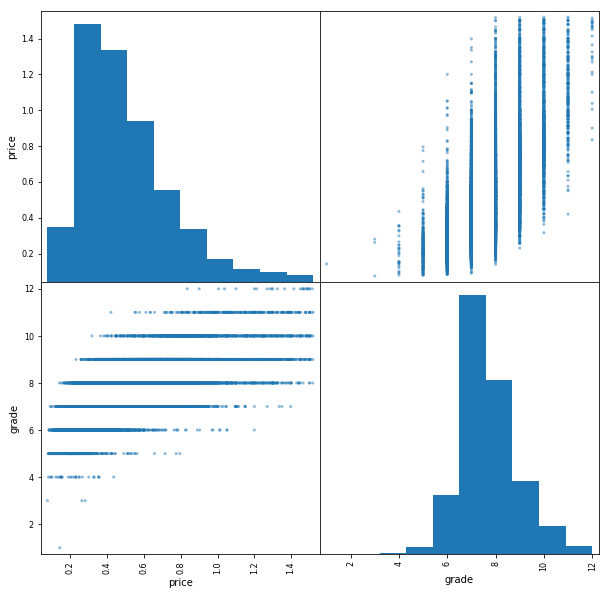

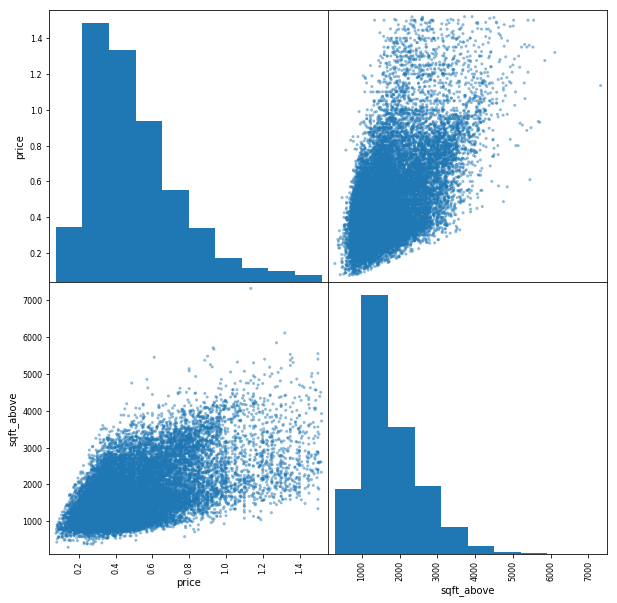

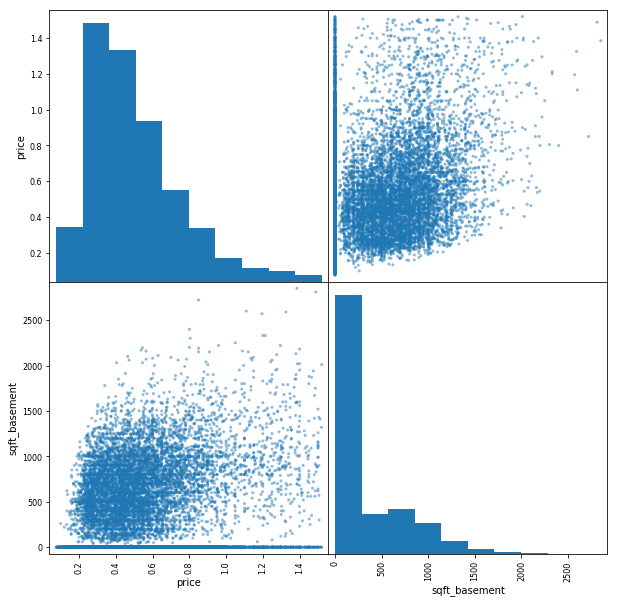

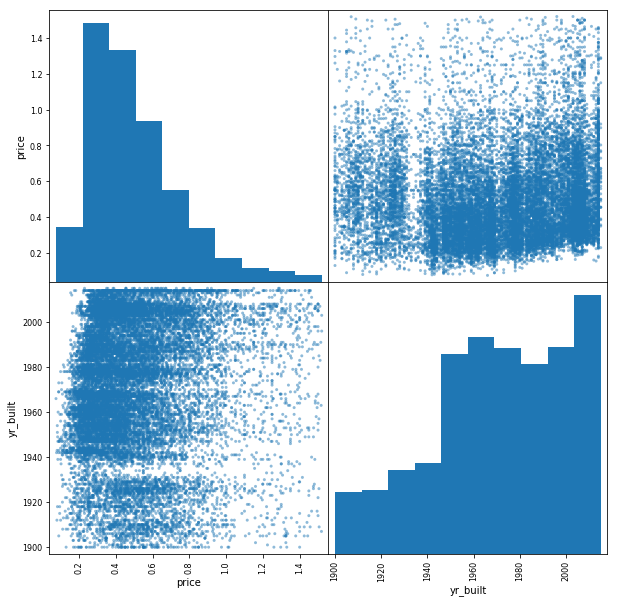

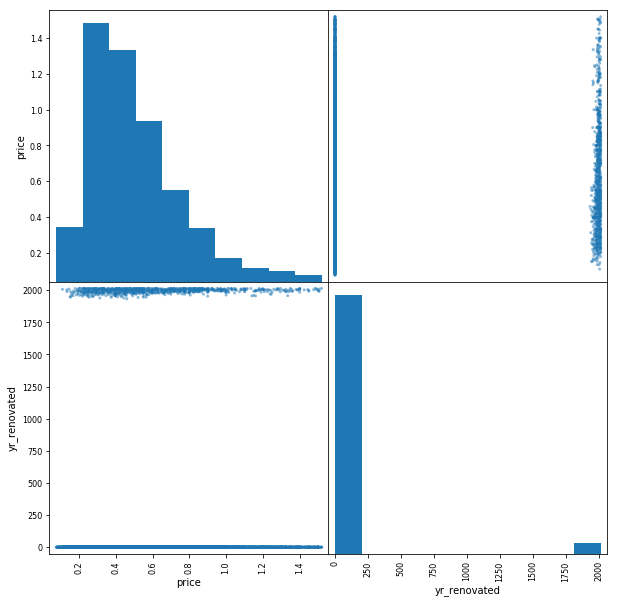

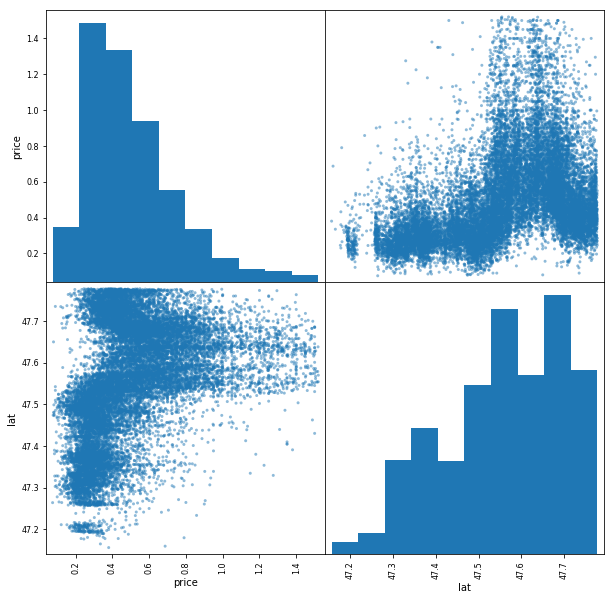

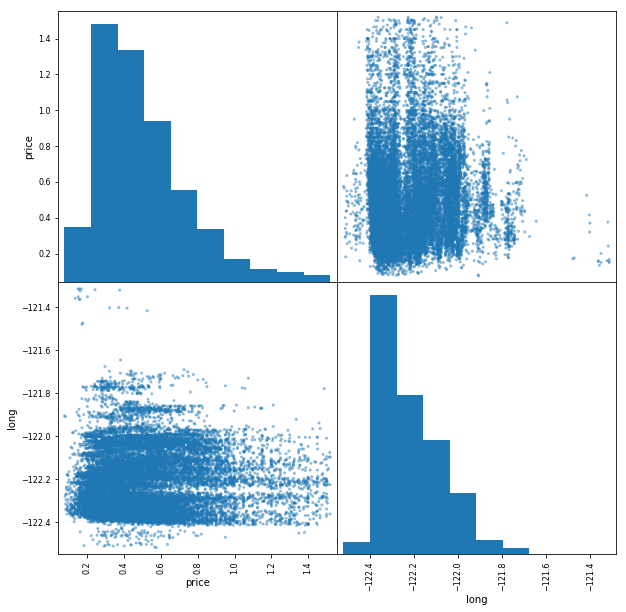

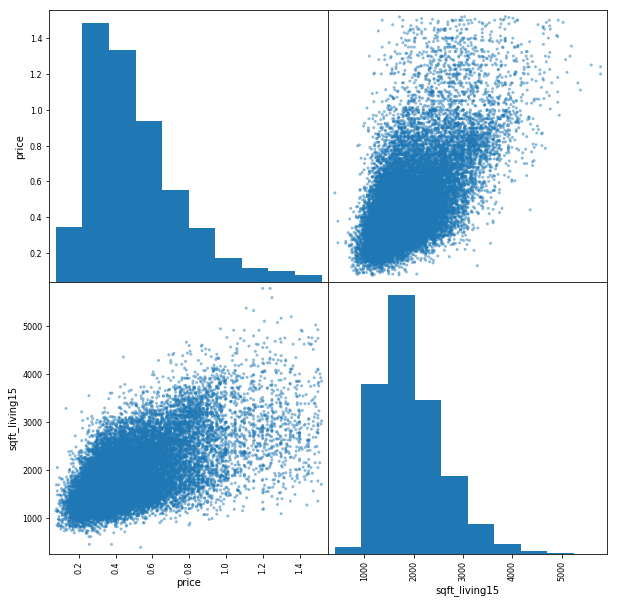

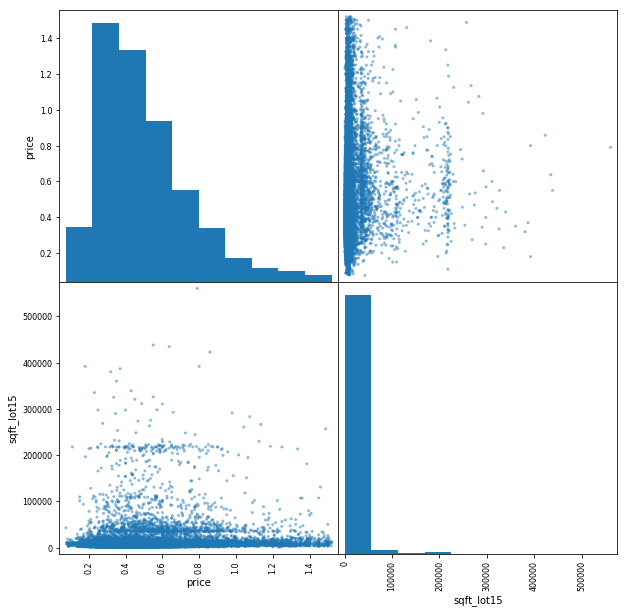

grade            0.666302
sqft_living      0.657659
sqft_living15    0.590617
sqft_above       0.560116
bathrooms        0.487838
lat              0.394001
bedrooms         0.317510
view             0.307041
floors           0.277549
sqft_basement    0.273660
yr_renovated     0.105377
sqft_lot         0.093374
waterfront       0.086974
sqft_lot15       0.077978
yr_built         0.058862
long             0.048668
condition        0.034121
dtype: float64

In [13]:
# 相関係数の一覧を表示する
df_data_4.corr()

# 説明変数を大きい順に取得する処理
corr= {}

for column in df_data_4.columns:
    if column in ["id", "price", "date", "zipcode"]:
        continue

    # priceとの関係性をグラフに表示する
    tmp = df_data_4[["price", column]]
    # 相関係数を確認しておく
    corr[column] = tmp.corr()[["price"]].loc[column][0]

    pd.plotting.scatter_matrix(tmp, figsize=(10,10))
    plt.show()
    
# 辞書型をpandassの形式に変換し、相関係数が大きい順に表示する
df_corr = pd.Series(corr)
display(df_corr.sort_values(ascending=False))

上記より、やや相関ありとなる指標の「0.2」以上の相関係数があるデータを元に調査を行う

- qft_living
   - 0.701927
- grade
   - 0.667023
- sqft_above
   - 0.605096
- sqft_living15
   - 0.585762
- bathrooms
   - 0.524877
- view
   - 0.397335
- sqft_basement
   - 0.324523
- bedrooms
   - 0.315898
- lat
   - 0.307793
- waterfront
   - 0.266853
- floors
   - 0.256294

## 予測モデルを構築

In [15]:
y_var = "price"
# 正の相関が見られる0.4以上のデータを利用することにする
X_var = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]

## 係数を求める
y=df_data_4[y_var].values
X=df_data_4[X_var].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)


print("決定係数=",regr.score(X,y))
print ("傾き")
print(regr.coef_)
print ("切片")
print(regr.intercept_)

#係数を取り出す．
#a0 = regr.intercept_
#a1 = regr.coef_[0]
#a2 = regr.coef_[1]

import statsmodels.api as sm #線形回帰分析と同時にAICを計算してくれる
model = sm.OLS(y, X).fit()
print("AIC:", round(model.aic), "変数:",list(X_var))

決定係数= 0.522857750752
傾き
[  1.47481793e-04   9.49338648e-02  -7.06278501e-05   4.78273431e-05
  -2.07617979e-02]
切片
-0.444619452199
AIC: -12355.0 変数: ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']


In [16]:
#VIFの計算
# 説明変数の候補は全体から絞る必要がある
X_var = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]
df_vif = df_data_4[X_var]

for cname in df_vif.columns:  
    y_vif=df_vif[cname]
    X_vif=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_vif, y_vif)
    rsquared = regr.score(X_vif,y_vif)
    print(cname,":" ,1/(1-np.power(rsquared,2)))

sqft_living : 2.98690525342
grade : 1.63492432272
sqft_above : 2.44593745108
sqft_living15 : 1.62552646901
bathrooms : 1.45343723639


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5, random_state=1234, shuffle=True)
kf.get_n_splits(X, y)

df_result = pd.DataFrame()

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
    df_result = pd.concat([df_result, df], axis=0)

# 評価指標の算出
y_test = df_result["y_test"]
y_pred = df_result["y_pred"]
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )


TRAIN: [    0     1     2 ..., 21085 21086 21088] TEST: [    4    13    14 ..., 21081 21083 21087]
TRAIN: [    0     1     2 ..., 21086 21087 21088] TEST: [    5     6     7 ..., 21056 21062 21068]
TRAIN: [    3     4     5 ..., 21085 21087 21088] TEST: [    0     1     2 ..., 21079 21082 21086]
TRAIN: [    0     1     2 ..., 21086 21087 21088] TEST: [   11    28    39 ..., 21073 21074 21080]
TRAIN: [    0     1     2 ..., 21083 21086 21087] TEST: [    3    10    15 ..., 21084 21085 21088]
MSE=0.03
RMSE=0.172
MAE=0.13


## 現状の最適な組み合わせ

- "grade", "sqft_living", "sqft_living15", "sqft_above", "bathrooms", "lat", "view", "bedrooms"
   - 位置情報であるlatが入っているが良いのか
   - sqft_living と sqft_living15は互いに関係性がありそうな値ではあるが違うのかな
   - viewの部分が気になる...なんだろう
- 今のところ主にグレードと広さなのかなという印象


## 気になる点メモ

- 外れ値を除外する基準ってどうやって決めるのだろうか
   - 感覚とか思い切って今回外れ値を除外してしまったが本当は駄目なんだろうな
   - 多重共線性等の場合は良さそうだが...
   - 外れ値を除外して生成したモデルの検証には、外れ値を含んだデータでチェックする形で良いのだろうか
- 外れ値など行のデータを削除することには取り組めたが、説明変数を減らす方法はAICしか利用していない
   - 他の方法を試してみたい
- 既存の説明変数から新たな説明変数を作って仮説検証してみるのはどうだろうか
   - 土地の部分やリフォームしたしていないの部分はまだまだ調査できそう
   - 購入した年月による関係性があるのかないのかはもっとみてみたい
- 識別をした後に回帰で求めて、それらを組み合わせたモデルを作成するってことはありえるのだろうか
   - 住宅の土地がA地点周辺はこのモデルだけど、B地点周辺はこのモデルがよく当てはまるなど
   - 識別された中でよりよく当てはまるものを採用するみたいなことってあるのかな...
- 他の方のを参考に勉強したい

並列化メモ

## 相関係数0.2以上の説明変数を対象にAICが最も低い値を取得する

AICの全ての組み合わせを確認し、最も低いAICである説明変数の組み合わせを用いてモデルを構築してみる。<br>
なお、21個の説明変数のうち、先程の相関係数を求めた際に少しでも相関があると感じられる0.2以上の値をベースに利用する。<br>
また、単純に組わせの処理を直列で実行すると処理時間がかかってしまうので、
Pythonで並列処理を組み込むことで処理の高速化に取り組んで見る。

In [ ]:
# 相関係数が0.2以上のものをベースに検索を行うことにする
df_data_3 = df_data_2[["price", "grade", "sqft_living", "sqft_living15", "sqft_above", "bathrooms", "lat", "view", "bedrooms"]]

### 並列実行のための準備
import itertools #組み合わせを求めるときに使う

# 並列で実施するには並列実行対象のものを配列で渡す必要がある。
# そのため、検索したい組み合わせのリストを配列にして並列処理に渡すことにする
combination_all = []
for i in range(len(df_data_3)):
    combi = itertools.combinations(df_data_3.drop("price",axis=1).columns, i+1) #組み合わせを求める
    for v in combi:
        combination_all.append(v)


# 並列処理で必要なライブラリをimport
from multiprocessing import Pool
from multiprocessing import Process
import multiprocessing as multi

# CPUの数-1のプロセスを立ち上げる
## (MAX CPU使うと他の作業ができなかった...)
p = Pool(multi.cpu_count()-1)

# AICを計算する
def check_aic_data3(v):
    y = df_data_3["price"]
    X = sm.add_constant(df_data_2[list(v)])
    model = sm.OLS(y, X).fit()
    print("AIC:", round(model.aic), "変数:",list(v))
    return {'aic': round(model.aic), 'values': list(v)}

# 並列処理を実行
result = p.map(check_aic_data3, combination_all)
p.close()

# AICが小さい値を取得する
data_result = pd.DataFrame(result);
data_min_aic = data_result.sort_values(["aic"]).head(1)
print("====minimam AIC====")
display(data_min_aic["aic"])
print("====minimam Values====")
display(data_min_aic["values"].values)


メモ: ローカルPC(CPU 4つ)じゃ全然終わらなかった...;;


その他取り組みメモ

 yr_renovated をあるなしで分類してみる

/Users/megadreams14/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


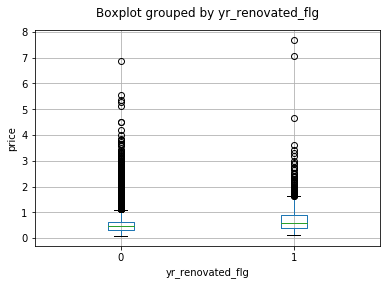

In [21]:
## データを細かく分析する
df_data.sort_values(["price"], ascending= False)
df_renovated = df_data

# yr_renovated をあるなしで分類してみる
df_renovated["yr_renovated_flg"] = df_renovated["yr_renovated"]

df_renovated["yr_renovated_flg"] = df_renovated["yr_renovated_flg"].where(df_renovated["yr_renovated_flg"] > 0, 0)
df_renovated["yr_renovated_flg"] = df_renovated["yr_renovated_flg"].where(df_renovated["yr_renovated_flg"] == 0, 1)

#df_renovated[["price", "yr_renovated_flg"]]
#df_renovated.plot(kind="scatter",x="yr_renovated_flg",y="price", alpha=0.7,s=10)#散布図の作成

df_renovated.boxplot(column="price",by="yr_renovated_flg")
plt.title("")
plt.ylabel("price")
plt.show()


経度緯度など土地の場所と住宅価格についてグラフを表してみたい。